#1. Report Auto-Generation

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Report saved as 'employee_evaluation_report.csv'


<ipython-input-13-67fef001d811>:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Overall_Avg', y='Name', data=sorted_results, palette='coolwarm')


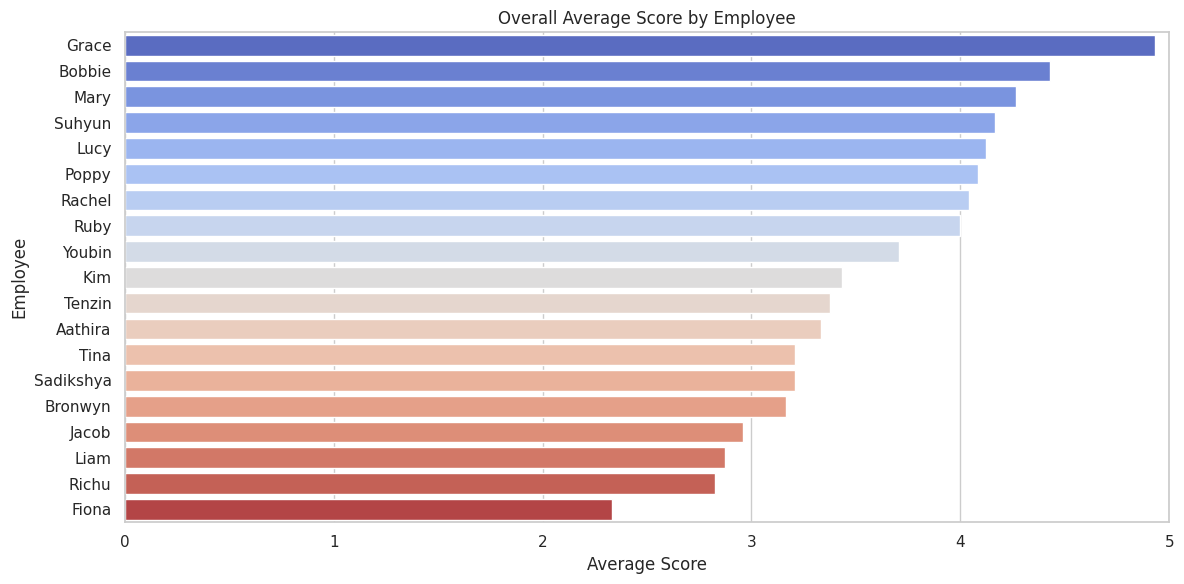

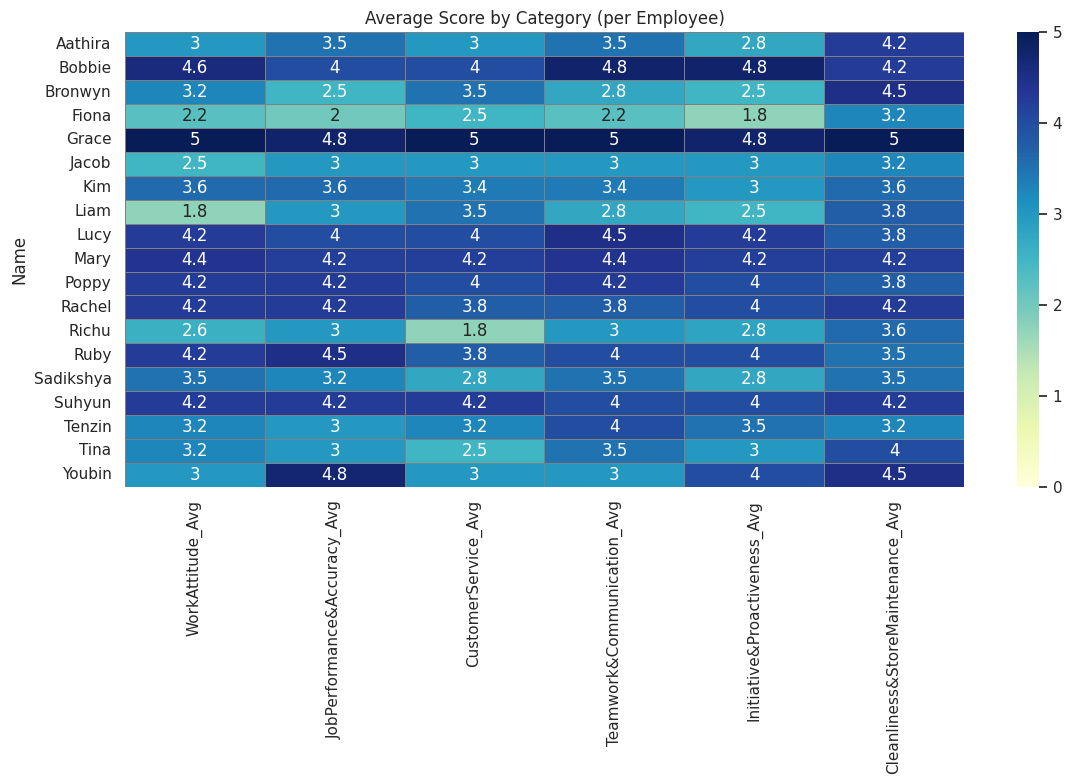

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define file path
file_path = "/content/drive/MyDrive/ColabData/StaffEvaluation.csv"

# Read the CSV file (assuming first row is header and data is clean)
df = pd.read_csv(file_path)

# Strip any extra whitespace from column names
df.columns = df.columns.str.strip()

# Ensure first column is named 'Name'
df.rename(columns={df.columns[0]: 'Name'}, inplace=True)

# Remove rows where 'Name' is missing
df = df[df['Name'].notna()].copy()

# Convert all score columns to numeric
for col in df.columns[1:]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Define evaluation categories based on prefix
categories = [
    'WorkAttitude',
    'JobPerformance&Accuracy',
    'CustomerService',
    'Teamwork&Communication',
    'Initiative&Proactiveness',
    'Cleanliness&StoreMaintenance'
]

# Create results DataFrame
results = pd.DataFrame()
results['Name'] = df['Name']

# Calculate average score for each category
for category in categories:
    category_cols = [col for col in df.columns if col.startswith(category)]
    results[f'{category}_Avg'] = df[category_cols].mean(axis=1, skipna=True)

# Calculate overall average
all_score_cols = [col for col in df.columns if any(col.startswith(cat) for cat in categories)]
results['Overall_Avg'] = df[all_score_cols].mean(axis=1, skipna=True)

# Grade assignment based on Overall_Avg
def assign_grade(avg):
    if avg >= 4.5:
        return 'A'
    elif avg >= 4.0:
        return 'B'
    elif avg >= 3.0:
        return 'C'
    elif avg >= 2.0:
        return 'D'
    else:
        return 'F'

results['Grade'] = results['Overall_Avg'].apply(assign_grade)

# Save to CSV
results.to_csv("employee_evaluation_report.csv", index=False)
print("✅ Report saved as 'employee_evaluation_report.csv'")

##1.1. Download the file

In [14]:
from google.colab import files
files.download('employee_evaluation_report.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#2. Visualisation

In [ ]:
# Overall average score bar chart
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sorted_results = results.sort_values(by='Overall_Avg', ascending=False)
sns.barplot(x='Overall_Avg', y='Name', data=sorted_results, palette='coolwarm')
plt.title('Overall Average Score by Employee')
plt.xlabel('Average Score')
plt.ylabel('Employee')
plt.xlim(0, 5)
plt.tight_layout()
plt.show()

# Category-wise heatmap
category_avgs = results.set_index('Name')[[f'{cat}_Avg' for cat in categories]]
plt.figure(figsize=(12, 8))
sns.heatmap(category_avgs, annot=True, cmap='YlGnBu', vmin=0, vmax=5, linewidths=0.5, linecolor='gray')
plt.title('Average Score by Category (per Employee)')
plt.tight_layout()
plt.show()